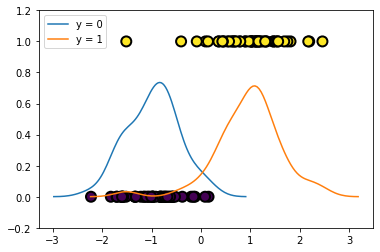

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)

plt.scatter(X0, y, c=y, s=100, edgecolor="k", linewidth=2)
sns.distplot(X0[y == 0, :], label="y = 0", hist=False)
sns.distplot(X0[y == 1, :], label="y = 1", hist=False)
plt.ylim(-0.2, 1.2)
plt.show()

In [11]:
X = sm.add_constant(X0)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0) # disp = 0 , 어떤식으로 최적화가 되는지 보여주는 것
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 03 Dec 2020   Pseudo R-squ.:                  0.7679
Time:                        20:58:00   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


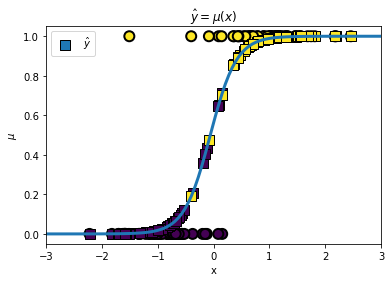

In [12]:
xx = np.linspace(-3, 3, 100)
mu = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, mu, lw=3)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y} = \mu(x)$")
plt.legend()
plt.show()

### Fitted values / 판별 함수 ###
- 밸류값을 이용하여 분류 문제 풀 수 있음

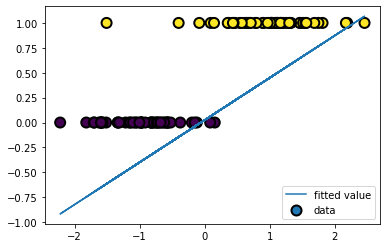

In [16]:
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2, label="data")
plt.plot(X0, logit_res.fittedvalues * 0.1, label="fitted value")
plt.legend()
plt.show()

### 로지스틱 회귀 성능 측정 ###
- 의사 결정 계수 (R square) 값으로 측정